## 数值稳定性和模型初始化
### 梯度消失和梯度爆炸
#### 梯度消失

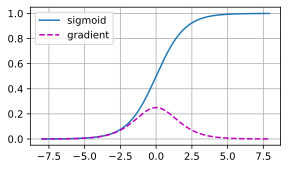

In [2]:
%matplotlib inline
import torch
import sys
sys.path.append(r"/Users/kingsleycheng/Documents/github/UCAS/DeepLearning/mytorch/")
import mytorch

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

mytorch.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], 
             legend=["sigmoid", 'gradient'], figsize=(4.5,2.5))

#### 梯度爆炸

In [3]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))  
    # torch.mul(a, b) 是矩阵对应位置相乘
    # torch.mm(a, b) 是矩阵乘法
print("乘以100个矩阵后\n", M)

一个矩阵 
 tensor([[ 1.1475, -1.1012,  1.5958, -1.5574],
        [-0.6879, -0.2874,  1.1598,  1.7663],
        [-1.4802, -1.0529,  1.7059, -0.2435],
        [ 0.3948, -2.2400,  0.0821, -1.3596]])
乘以100个矩阵后
 tensor([[ 1.8460e+24,  2.9763e+23, -2.5637e+23, -1.0302e+25],
        [ 1.7263e+23,  2.7834e+22, -2.3975e+22, -9.6340e+23],
        [ 3.9311e+23,  6.3381e+22, -5.4595e+22, -2.1938e+24],
        [ 1.5663e+24,  2.5254e+23, -2.1753e+23, -8.7411e+24]])
